In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing the libraries**

In [87]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB3

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import os

**Loading the Training data**

In [88]:
grade_0 = []
grade_1 = []
grade_2 = []
grade_3 = []
grade_4 = []

In [89]:
for grade0 in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/0'):
    if (grade0.endswith(".png") or grade0.endswith(".jpg")):
        grade_0.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/0', grade0))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/0', grade0))

for grade1 in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/1'):
    if (grade1.endswith(".png") or grade1.endswith(".jpg")):
        grade_1.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/1', grade1))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/1', grade1))

for grade2 in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/2'):
    if (grade2.endswith(".png") or grade2.endswith(".jpg")):
        grade_2.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/2', grade2))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/2', grade2))

for grade3 in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/3'):
    if (grade3.endswith(".png") or grade3.endswith(".jpg")):
        grade_3.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/3', grade3))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/3', grade3))

for grade4 in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/4'):
    if (grade4.endswith(".png") or grade4.endswith(".jpg")):
        grade_4.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/4', grade4))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/4', grade4))

In [90]:
train_grade_0_df = pd.DataFrame({'Image': grade_0, 'Label': 'Grade 0'})
train_grade_1_df = pd.DataFrame({'Image': grade_1, 'Label': 'Grade 1'})
train_grade_2_df = pd.DataFrame({'Image': grade_2, 'Label': 'Grade 2'})
train_grade_3_df = pd.DataFrame({'Image': grade_3, 'Label': 'Grade 3'})
train_grade_4_df = pd.DataFrame({'Image': grade_4, 'Label': 'Grade 4'})
training_data = pd.concat([train_grade_0_df, train_grade_1_df, train_grade_2_df, train_grade_3_df, train_grade_4_df])

In [91]:
print('Training Data Class Distribution')
print("Grade 0: ", len(grade_0))
print("Grade 1: ", len(grade_1))
print("Grade 2: ", len(grade_2))
print("Grade 3: ", len(grade_3))
print("Grade 4: ", len(grade_4))

Training Data Class Distribution
Grade 0:  2286
Grade 1:  1046
Grade 2:  1516
Grade 3:  757
Grade 4:  173


**For validation data**

In [92]:
grade_0_val = []
grade_1_val = []
grade_2_val = []
grade_3_val = []
grade_4_val = []

In [93]:
for grade0val in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/0'):
    if (grade0val.endswith(".png") or grade0val.endswith(".jpg")):
        grade_0_val.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/0', grade0val))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/0', grade0val))


for grade1val in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/1'):
    if (grade1val.endswith(".png") or grade1val.endswith(".jpg")):
        grade_1_val.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/1', grade1val))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/1', grade1val))

for grade2val in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/2'):
    if (grade2val.endswith(".png") or grade2val.endswith(".jpg")):
        grade_2_val.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/2', grade2val))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/2', grade2val))

for grade3val in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/3'):
    if (grade3val.endswith(".png") or grade3val.endswith(".jpg")):
        grade_3_val.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/3', grade3val))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/3', grade3val))

for grade4val in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/4'):
    if (grade4val.endswith(".png") or grade4val.endswith(".jpg")):
        grade_4_val.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/4', grade4val))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/val/4', grade4val))

In [94]:
print("Grade 0: ", len(grade_0_val))
print("Grade 1: ", len(grade_1_val))
print("Grade 2: ", len(grade_2_val))
print("Grade 3: ", len(grade_3_val))
print("Grade 4: ", len(grade_4_val))

Grade 0:  328
Grade 1:  153
Grade 2:  212
Grade 3:  106
Grade 4:  27


**For test data**

In [95]:
grade_0_test = []
grade_1_test = []
grade_2_test = []
grade_3_test = []
grade_4_test = []

In [97]:
for grade0test in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/0'):
    if (grade0test.endswith(".png") or grade0test.endswith(".jpg")):
        grade_0_test.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/0', grade0test))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/0', grade0test))


for grade1test in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/1'):
    if (grade1test.endswith(".png") or grade1test.endswith(".jpg")):
        grade_1_test.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/1', grade1test))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/1', grade1test))

for grade2test in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/2'):
    if (grade2test.endswith(".png") or grade2test.endswith(".jpg")):
        grade_2_test.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/2', grade2test))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/2', grade2test))

for grade3test in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/3'):
    if (grade3test.endswith(".png") or grade3test.endswith(".jpg")):
        grade_3_test.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/3', grade3test))

    #print(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/3', grade3test))

for grade4test in os.listdir('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/4'):
    if (grade4test.endswith(".png") or grade4test.endswith(".jpg")):
        grade_4_test.append(os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity/test/4', grade4test))


In [98]:
print("Grade 0: ", len(grade_0_test))
print("Grade 1: ", len(grade_1_test))
print("Grade 2: ", len(grade_2_test))
print("Grade 3: ", len(grade_3_test))
print("Grade 4: ", len(grade_4_test))

Grade 0:  1278
Grade 1:  592
Grade 2:  894
Grade 3:  446
Grade 4:  102


**Plotting a grade 0 image**

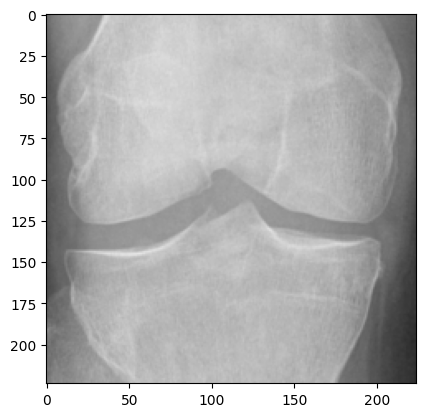

150528


In [99]:
import matplotlib.pyplot as plt
import cv2
image = cv2.imread(grade_0[0])
%matplotlib inline
plt.imshow(image)
plt.show()
print(image.size)

In [101]:
base_dir = "/kaggle/input/knee-osteoarthritis-dataset-with-severity"

train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')
test_dir = os.path.join(base_dir, 'test')

In [100]:
NUM_CLASSES = 5
IMAGE_SIZE=[224, 224]
BATCH_SIZE=32

**Train, test and validation generators**

In [103]:
train_val_generator = ImageDataGenerator(
                                        preprocessing_function=preprocess_input,    
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.1,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=False,
                                        fill_mode='nearest'
                                        )


# Train data generator
train_data = train_val_generator.flow_from_directory(train_dir, 
                                                    target_size=IMAGE_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True
                                                    )


Found 5778 images belonging to 5 classes.


In [104]:
val_data = train_val_generator.flow_from_directory(val_dir, 
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  color_mode='rgb',
                                                  shuffle=True
                                                  )

# Test data generator
test_generator  = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data = test_generator.flow_from_directory(test_dir, 
                                               target_size=IMAGE_SIZE,
                                               batch_size=1,
                                               class_mode='categorical',
                                               color_mode='rgb',
                                               shuffle=False
                                               )

Found 826 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.


**Using MobileNetV2 model**

In [105]:
base_model = MobileNetV2(input_shape=IMAGE_SIZE + [3],
                            include_top=False,
                            weights='imagenet',
                            pooling='avg'
                           )

base_model.trainable = False  

In [67]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [106]:

# Freeze the base model initially (for feature extraction)
base_model.trainable = False  

x_input = base_model.input

x = Dense(128,activation='relu')(base_model.output)
x = Dropout(0.2)(x)

output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(x_input, output)


# Compile Model
model.compile(optimizer='adam',  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

base_model.trainable = True  
for layer in base_model.layers[:-10]:  # Keep first layers frozen
    layer.trainable = False


In [109]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(train_data,
                 validation_data=val_data,
                 epochs=10,
                 callbacks=[reduce_lr, early_stopping],
                 verbose=1)

Epoch 1/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 74s 395ms/step - accuracy: 0.5791 - loss: 1.0019 - val_accuracy: 0.4806 - val_loss: 1.2928 - learning_rate: 0.0010
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 98s 526ms/step - accuracy: 0.5867 - loss: 0.9886 - val_accuracy: 0.4770 - val_loss: 1.5153 - learning_rate: 0.0010
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 74s 395ms/step - accuracy: 0.5608 - loss: 1.0271 - val_accuracy: 0.3051 - val_loss: 3.1338 - learning_rate: 0.0010
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 73s 389ms/step - accuracy: 0.5779 - loss: 1.0007 - val_accuracy: 0.4540 - val_loss: 1.8337 - learning_rate: 0.0010
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 83s 446ms/step - accuracy: 0.5789 - loss: 0.9852 - val_accuracy: 0.4407 - val_loss: 1.5975 - learning_rate: 0.0010
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 74s 388ms/step - accuracy: 0.5936 - loss: 0.9556 - val_accuracy: 0.3450 - val_loss: 2.3409 - learning_rate: 0.0010
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 72s 386ms/step - accuracy: 0.5

In [110]:
# Thank you